In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
experiment_data= pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")

In [0]:
experiment_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [0]:
print('test sample size:', len(experiment_data[experiment_data.year == 6]))
print('control sample size:', len(experiment_data[experiment_data.year == 7]))


test sample size: 4071
control sample size: 4076


In [0]:
#1. Did people become less trusting from 2012 to 2014?

In [0]:
experiment_2012=experiment_data[(experiment_data['year']==6)]
print(experiment_2012.head())
experiment_2014=experiment_data[(experiment_data['year']==7)]
#experiment_2014.info()

  cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
0    CH     5     6      3        3  ...        5       4     2    60        1
1    CH    25     6      6        5  ...        3       2     2    59        1
2    CH    26     6      1        8  ...        6       3     1    24        2
3    CH    28     6      4        6  ...        6       2     2    64        1
4    CH    29     6      5        6  ...        7       2     2    55        1

[5 rows x 13 columns]


(array([109.,  88., 224., 326., 369., 826., 516., 759., 625., 234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

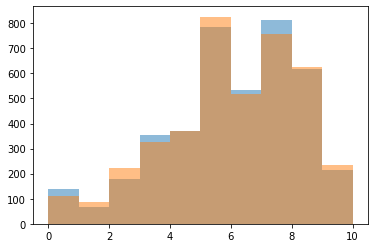

In [0]:
plt.hist(experiment_2012['ppltrst'], alpha= .5)
plt.hist(experiment_2014['ppltrst'], alpha= .5)

In [0]:
print(stats.describe(experiment_2012['ppltrst']))
print(stats.describe(experiment_2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [0]:
# Are the groups significantly different?
stats.ttest_ind(experiment_2012['ppltrst'],experiment_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [0]:
# No significant change between 2012 and 2014. Failed to reject the null value.

TypeError: ignored

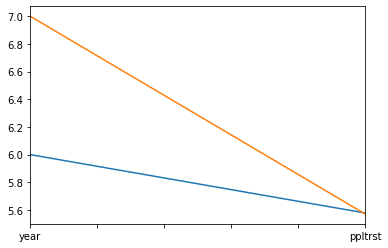

In [0]:
fig = experiment_2012[['year', 'ppltrst']].mean().plot()
experiment_2014[['year', 'ppltrst']].mean().plot()(ax=fig)
plt.legend(['2012','2014'])
plt.title('Comparing changes in trusting 2012-2014')
plt.show()

In [0]:
#2. Did people become less trusting from 2012 to 2014?

(array([   8.,   10.,   23.,   55.,   85.,  292.,  312.,  724., 1230.,
        1337.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

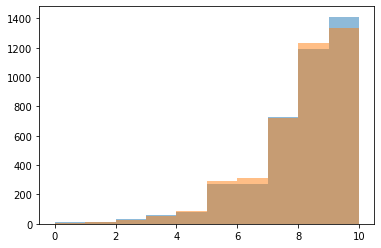

In [0]:
plt.hist(experiment_2012['happy'], alpha= .5)
plt.hist(experiment_2014['happy'], alpha= .5)

In [0]:
print(stats.describe(experiment_2012['happy']))
print(stats.describe(experiment_2014['happy']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [0]:
stats.ttest_ind(experiment_2012['happy'],experiment_2014['happy'])

Ttest_indResult(statistic=1.2074597686358974, pvalue=0.2272901912283969)

In [0]:
# Fail to reject the null =hypothesis. Both samples are from the same distribution.


In [0]:
#3. Pick three or four of the countries in the sample and
 #compare how often people met socially in 2014.
 #Are there differences, and if so, which countries stand out?

In [0]:
# Unique countries
experiment_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc70e3ae438>,
      dtype=object)

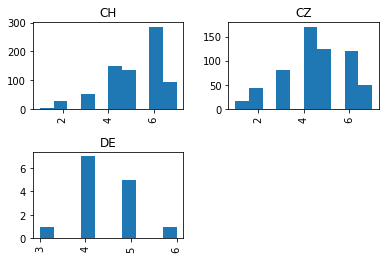

In [0]:
#select CH, CZ, DE
filter_list=['CH','CZ','DE']
expt_chczde_2014=experiment_2014[experiment_2014['cntry'].isin(filter_list)]

expt_chczde_2014['cntry'].unique()
#expt_chczde_2014.head()
expt_chczde_2014['sclmeet'].hist(by=expt_chczde_2014['cntry'])

In [0]:
# no perfect normal
#Kruskal-Wallis Test
stats.kruskal(
    expt_chczde_2014.loc[expt_chczde_2014['cntry']=='CH',['sclmeet']],
    expt_chczde_2014.loc[expt_chczde_2014['cntry']=='CZ',['sclmeet']],
    expt_chczde_2014.loc[expt_chczde_2014['cntry']=='DE',['sclmeet']]
)

KruskalResult(statistic=78.92727862878502, pvalue=7.263721926337026e-18)

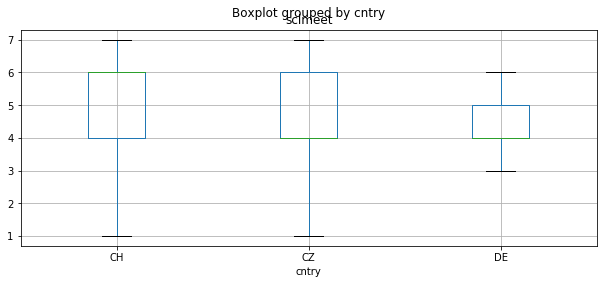

In [0]:
#COMPARE MEDIANS
expt_chczde_2014.boxplot('sclmeet',by='cntry',figsize=(10,4))

In [0]:
# DE stands out

In [0]:
#4. Pick three or four of the countries in the sample 
#and compare how often people took part in social activities,
 #relative to others their age, in 2014. Are there differences, 
 #and if so, which countries stand out?

In [0]:
experiment_2014['agea'].unique()

array([ 69,  30,  49,  51,  32,  31,  75,  65,  67,  43,  50,  85,  26,
        60,  35,  29,  33,  17,  44,  57,  47,  24,  52,  84,  63,  46,
        19,  36,  18,  53,  25,  72,  78,  89,  41,  55,  22,  80,  56,
        71,  28,  20,  27,  34,  58,  48,  23,  39,  16,  54,  59,  40,
        83,  64,  42,  73,  61,  37,  68,  21,  79,  38,  70,  62,  45,
        74,  82,  76,  81,  86,  92,  87,  91,  15,  93,  90, 101,  94,
        95, 114])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc70ddb84e0>,
      dtype=object)

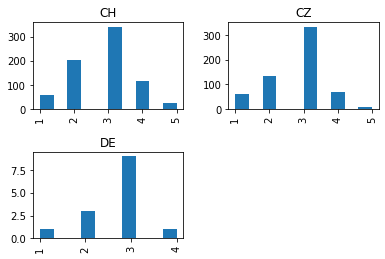

In [0]:
expt_chczde_2014['sclact'].hist(by=expt_chczde_2014['cntry'])
# close to normal distribution. 

In [0]:
#one way anova
stats.f_oneway(
    expt_chczde_2014.loc[expt_chczde_2014['cntry']=='CH',['sclmeet']],
    expt_chczde_2014.loc[expt_chczde_2014['cntry']=='CZ',['sclmeet']],
    expt_chczde_2014.loc[expt_chczde_2014['cntry']=='DE',['sclmeet']]
)

F_onewayResult(statistic=array([41.4716332]), pvalue=array([3.28824154e-18]))

Ruff Figural Fluency Test 

In [0]:
experiment2_data=pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")

In [0]:
experiment2_data.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [0]:
#1. Is there a significant difference in the number of unique designs
# drawn by the same participants from Measurement 2 to Measurement 3?

In [35]:
persev123=experiment2_data.pivot(index='Casenr',columns='Measurement',values='Perseverative')
persev123.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

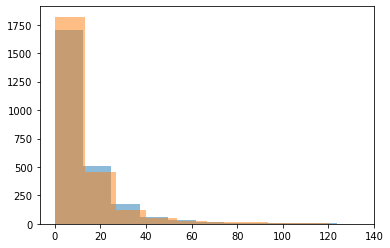

In [38]:
#Histogram
plt.hist(persev123['Measurement 3 (2008-2012)'], alpha=.5)
plt.hist(persev123['Measurement 2 (2006-2008)'], alpha=.5)

In [0]:
#Reject the null . Sognificant difference between 2 and 3.